<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basic-normal-dist" data-toc-modified-id="Basic-normal-dist-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic normal dist</a></span></li><li><span><a href="#t-dist" data-toc-modified-id="t-dist-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>t dist</a></span></li><li><span><a href="#Group-compare" data-toc-modified-id="Group-compare-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Group compare</a></span></li><li><span><a href="#Hierarchical-Model" data-toc-modified-id="Hierarchical-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hierarchical Model</a></span></li></ul></div>

In [33]:
%matplotlib inline
     
import pymc3 as pm 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Basic normal dist
- with outlier

In [4]:
data = np.array([51.06, 55.12, 53.73, 50.24, 52.05, 56.40, 48.45,
                 52.34, 55.65, 51.49, 51.86, 63.43, 53.00, 56.09, 51.93, 52.31, 52.33,
                 57.48, 57.44, 55.14, 53.93, 54.62, 56.09, 68.58, 51.36, 55.47, 50.73,
                 51.94, 54.95, 50.39, 52.91, 51.5, 52.68, 47.72, 49.73, 51.82, 54.99,
                 52.84, 53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42, 54.3, 53.84,
                 53.16])

with pm.Model() as model_g:
    mu = pm.Uniform('mu', 40, 75)
    sigma = pm.HalfNormal('sigma', sd=10)
    y = pm.Normal('y', mu=mu, sd=sigma, observed=data)
    trace_g = pm.sample(1100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]
Sampling 4 chains: 100%|██████████| 6400/6400 [00:01<00:00, 3570.58draws/s]
The acceptance probability does not match the target. It is 0.8840081265111706, but should be close to 0.8. Try to increase the number of tuning steps.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1bfcf748>,
      dtype=object)

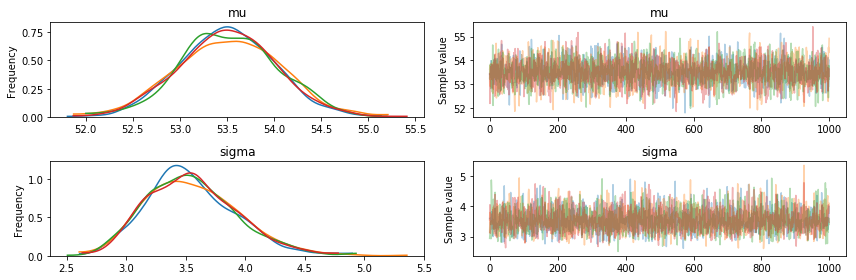

In [5]:
# burn in 100
chain_g = trace_g[100:]
pm.traceplot(chain_g)

In [7]:
pm.summary(chain_g)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,53.507841,0.520870,0.008277,52.464818,54.501111,3701.336929,0.999731
sigma,3.547965,0.377374,0.006130,2.829600,4.265241,3598.757962,0.999726


100%|██████████| 100/100 [00:00<00:00, 1251.35it/s]


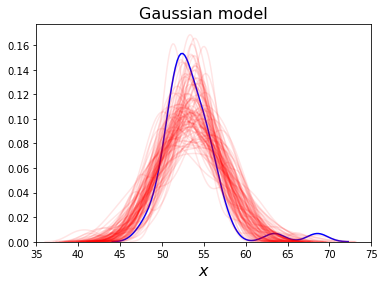

In [25]:
y_pred = pm.sample_posterior_predictive(chain_g, 100, model_g, size=len(data))
sns.kdeplot(data, color='b')
for i in y_pred['y']:
    sns.kdeplot(i[:, 3], color='r', alpha=0.1)
    plt.xlim(35, 75)
    plt.title('Gaussian model', fontsize=16)
    plt.xlabel('$x$', fontsize=16)

## t dist

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sigma, mu]
Sampling 4 chains: 100%|██████████| 6400/6400 [00:02<00:00, 2504.17draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1d546828>,
      dtype=object)

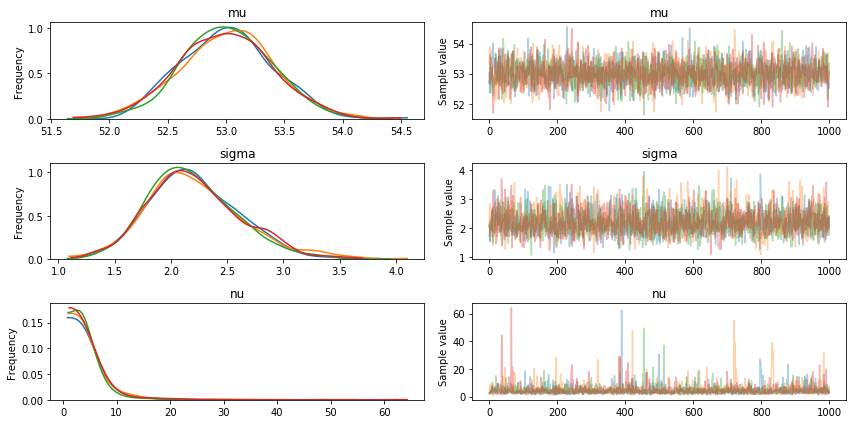

In [27]:
with pm.Model() as model_t:
    mu = pm.Uniform('mu', 40, 75)
    sigma = pm.HalfNormal('sigma', sd=10)
    nu = pm.Exponential('nu', 1/30)
    y = pm.StudentT('y', mu=mu, sd=sigma, nu=nu, observed=data)
    trace_t = pm.sample(1100)
chain_t = trace_t[100:]
pm.traceplot(chain_t)

In [28]:
pm.summary(chain_t)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,53.003203,0.395582,0.008003,52.248091,53.774398,2412.462765,0.999813
sigma,2.205614,0.411585,0.008463,1.414897,3.021729,2118.579057,1.000196
nu,4.676962,3.914509,0.095219,1.107129,10.650078,1548.969875,1.001975


100%|██████████| 100/100 [00:00<00:00, 792.97it/s]
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


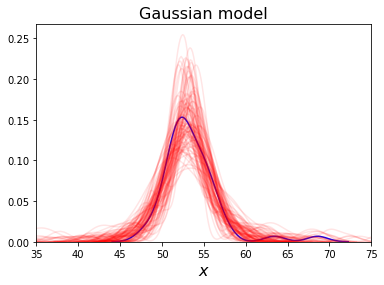

In [29]:
y_pred = pm.sample_posterior_predictive(chain_t, 100, model_t, size=len(data))
sns.kdeplot(data, color='b')
for i in y_pred['y']:
    sns.kdeplot(i[:, 3], color='r', alpha=0.1)
    plt.xlim(35, 75)
    plt.title('Gaussian model', fontsize=16)
    plt.xlabel('$x$', fontsize=16)

## Group compare

In [30]:
tips = sns.load_dataset('tips')
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


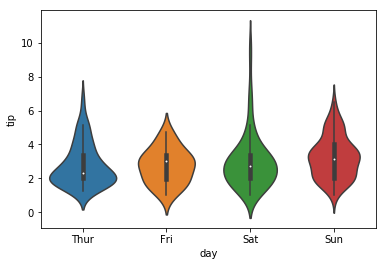

In [31]:
sns.violinplot(x='day', y='tip', data=tips)

In [44]:
y = tips['tip'].values
idx = pd.Categorical(tips['day']).codes
with pm.Model() as comparing_groups:
    means = pm.Normal('means', mu=0, sd=10, shape=len(set(idx)))
    sds = pm.HalfNormal('sds', sd=10, shape=len(set(idx)))
    nu = pm.Exponential('nu', 1/30, shape=len(set(idx)))
    y = pm.StudentT('y', mu=means[idx], sd=sds[idx], nu=nu[idx], observed=y)
    trace_cg = pm.sample(5000)
chain_cg = trace_cg[100::]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sds, means]
Sampling 4 chains:  96%|█████████▌| 21089/22000 [00:12<00:00, 1686.79draws/s]

limit_output extension: Maximum message size of 10000 exceeded with 10011 characters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2060e390>,
      dtype=object)

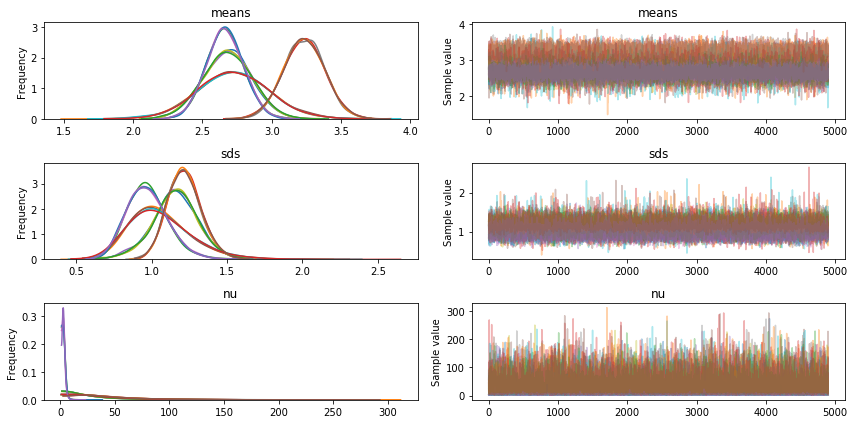

In [45]:
pm.traceplot(chain_cg)

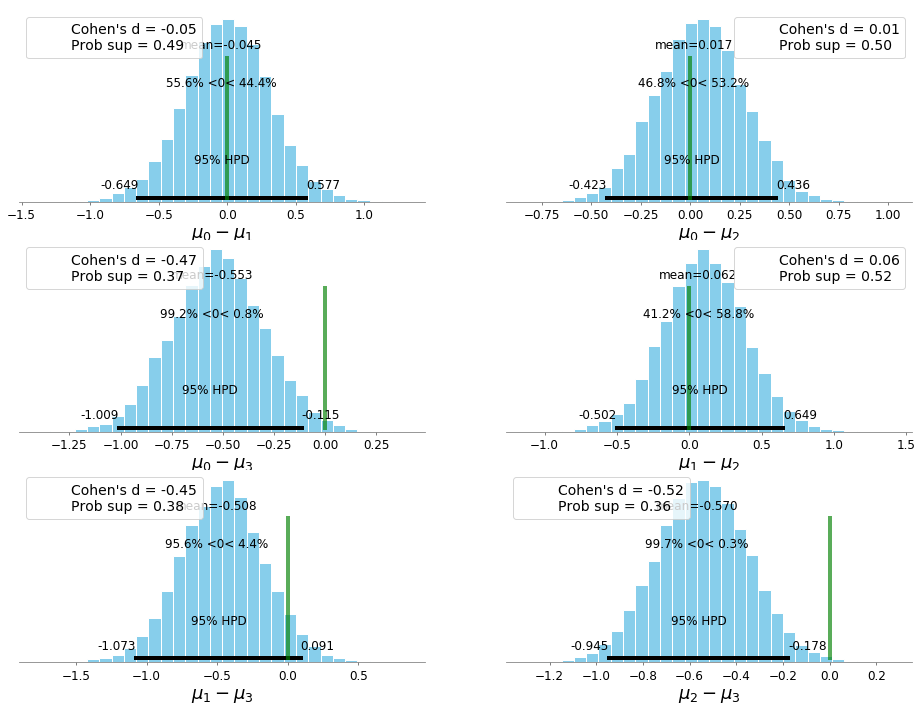

In [73]:
dist = dist = stats.norm()
_, ax = plt.subplots(3, 2, figsize=(16, 12))
comparisons = [(i,j) for i in range(4) for j in range(i+1, 4)]
pos = [(k,l) for k in range(3) for l in (0, 1)]
for (i, j), (k,l) in zip(comparisons, pos):
    means_diff = chain_cg['means'][:,i]-chain_cg['means'][:,j]
    d_cohen = (means_diff / np.sqrt((chain_cg['sds'][:,i]**2 +
                                     chain_cg['sds'][:,j]**2) / 2)).mean()
    ps = dist.cdf(d_cohen/(2**0.5))
    pm.plot_posterior(means_diff, ref_val=0, ax=ax[k, l],
                      color='skyblue')
    ax[k, l].plot(0, label="Cohen's d = {:.2f}\nProb sup = {:.2f}".format(d_cohen, ps) ,alpha=0)
    ax[k, l].set_xlabel('$\mu_{}-\mu_{}$'.format(i, j),
                        fontsize=18)
    ax[k,l ].legend(loc=0, fontsize=14)

## Hierarchical Model


In [83]:
N_samples =  [30, 30, 30]
G_samples =  [18, 3, 3]
group_idx = np.repeat(np.arange(len(N_samples)), N_samples)
data = []
for i in range(0, len(N_samples)):
    data.extend(np.repeat([1, 0], [G_samples[i], N_samples[i]-
                                   G_samples[i]]))

# here 3 groups are same

In [84]:
with pm.Model() as model_h:
    alpha = pm.HalfCauchy('alpha', beta=10)
    beta = pm.HalfCauchy('beta', beta=10)
    theta = pm.Beta('theta', alpha, beta, shape=len(N_samples))
    y = pm.Bernoulli('y', p=theta[group_idx], observed=data)
    trace_j = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, beta, alpha]
Sampling 4 chains: 100%|██████████| 10000/10000 [00:05<00:00, 1777.64draws/s]
There were 14 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
There were 14 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c21eee860>,
      dtype=object)

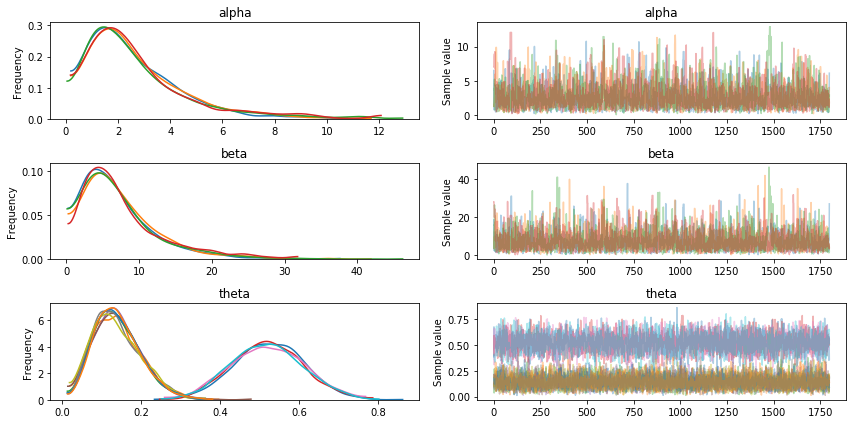

In [85]:
chain_j = trace_j[200:]
pm.traceplot(chain_j)

In [86]:
pm.summary(chain_j)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,2.727017,1.939553,0.041845,0.245746,6.792040,1695.697098,1.000510
beta,7.614968,5.625516,0.113861,0.500403,19.156929,1747.065155,1.001004
theta__0,0.520171,0.089814,0.001428,0.351928,0.701178,3226.223267,1.000478
theta__1,0.140050,0.059750,0.000904,0.034008,0.256042,4526.760634,0.999894
theta__2,0.139255,0.059540,0.000912,0.030051,0.251550,4054.953511,1.000039


Text(0.5, 0, '$\\theta_{prior}$')

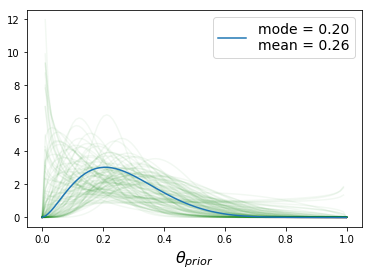

In [92]:
x = np.linspace(0, 1, 100)
for i in np.random.randint(0, len(chain_j), size=100):
    pdf = stats.beta(chain_j['alpha'][i], chain_j['beta'][i]).pdf(x)
    plt.plot(x, pdf,  'g', alpha=0.05)
dist = stats.beta(chain_j['alpha'].mean(), chain_j['beta'].mean())
pdf = dist.pdf(x)
mode = x[np.argmax(pdf)]
mean = dist.moment(1)
plt.plot(x, pdf, label='mode = {:.2f}\nmean = {:.2f}'.format(mode, mean))
plt.legend(fontsize=14)
plt.xlabel(r'$\theta_{prior}$', fontsize=16)

In [96]:
chain_j['alpha']

array([6.50760978, 1.76832987, 0.73880346, ..., 1.70561439, 1.08844032,
       1.84878152])